# Decision Tree

### Importação de Bibliotecas

In [3]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from matplotlib import pyplot as plt
from sklearn import metrics
%matplotlib inline

### Leitura de Arquivo CSV - atenção ao separador ";"

In [4]:
df = pd.read_csv("./emprestimo.csv",sep=";") 

### Transformação dos dados categóricos para numéricos (features), com exceção à classe (target)

In [5]:
translate = {
    'montante': { 'Alto': 2, 'Medio': 1, 'Baixo': 0 },
    'idade': { 'Senior': 2, 'Media': 1, 'Jovem': 0 },
    'salario': { 'Alto': 1, 'Baixo': 0 },
    'tem_conta': { 'Sim': 1, 'Nao': 0 },
    'empresta': { 'Sim': 1, 'Nao': 0 }
}

for col in df:
    df[col] = df[col].apply(lambda k: translate[col][k])
print(df.head()) # mostra informações básicas do dataset como quais colunas (e seus tipos) e uso de memória

   montante  idade  salario  tem_conta  empresta
0         1      2        0          1         0
1         1      2        0          0         0
2         0      2        0          1         1
3         2      1        0          1         1
4         2      0        1          1         1


Criando variaveis e resultados


In [6]:
x = df[['montante', 'idade', 'salario', 'tem_conta']]
y = df['empresta']
print(y.head())


0    0
1    0
2    1
3    1
4    1
Name: empresta, dtype: int64


### Treinamento do Modelo

In [7]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size=0.25, random_state=75, stratify=y) # 33% para Testes
print(train_x.head())
print(train_y.head())
print(test_x.head())
print(test_y.head())

    montante  idade  salario  tem_conta
7          1      1        0          1
13         2      1        0          0
8          1      0        1          1
12         0      2        1          1
5          2      0        1          0
7     0
13    0
8     1
12    1
5     0
Name: empresta, dtype: int64
    montante  idade  salario  tem_conta
10         1      1        1          0
4          2      0        1          1
2          0      2        0          1
0          1      2        0          1
10    1
4     1
2     1
0     0
Name: empresta, dtype: int64


In [8]:
from dataclasses import dataclass
@dataclass(frozen=True)
class ModelResult:
    n: int
    clf: DecisionTreeClassifier
    acc: float

In [9]:
def tree_model(max_depth: int):
    clf = DecisionTreeClassifier(max_depth=max_depth, criterion='entropy', random_state=42) 
    
    clf.fit(train_x, train_y)

    pred_y = clf.predict(test_x)
    acc = metrics.accuracy_score(test_y, pred_y)
    return ModelResult(acc=acc, clf=clf, n=max_depth)

results = {n: tree_model(n) for n in range(1,4)}
print(*[(n, r.acc) for n, r in results.items()])

(1, 0.5) (2, 0.5) (3, 0.75)


### Apresentação dos Resultados

Index(['montante', 'idade', 'salario', 'tem_conta'], dtype='object') ['1' '0']


[Text(0.4, 0.8333333333333334, 'montante <= 0.5\nentropy = 0.971\nsamples = 10\nvalue = [4, 6]\nclass = 0'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = 0'),
 Text(0.6, 0.5, 'tem_conta <= 0.5\nentropy = 0.985\nsamples = 7\nvalue = [4, 3]\nclass = 1'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = 1'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.811\nsamples = 4\nvalue = [1, 3]\nclass = 0')]

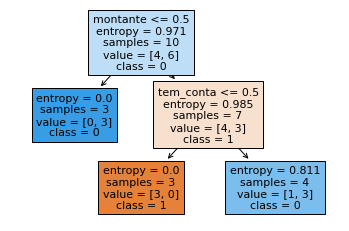

In [10]:
# Plotagem da árvore
clf = results[2].clf
f_names = test_x.columns
c_names = test_y.unique().astype(str)
print(f_names, c_names)
tree.plot_tree(clf, feature_names=f_names,class_names=c_names, filled=True)

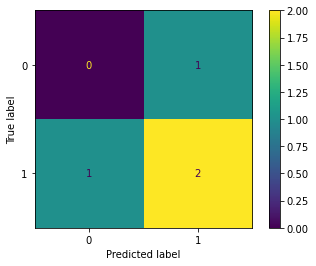

In [11]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
predictions = clf.predict(test_x);
cm = confusion_matrix(test_y, predictions, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=clf.classes_)
disp.plot()
plt.show()

In [12]:
# Testando para uma entrada específica:
W_test = pd.DataFrame({'montante': [0], 'idade': [2], 'salario': [0], 'tem_conta': [1]})
y_pred = clf.predict(W_test)
y_pred

array([1])